In [1]:
from benchmark.run_benchmark import cell_detect_bench
from NovelGan import Detect_cell
import anndata as ad
import scanpy as sc

data_cfg = {
    'PBMC(SLE)': {
        'data_path': './scdata/',
        'info_path': './scdata/info.tsv'
    }
}

method_cfg = {'NovelGan': 1}
metrics = ['ARI', 'NMI']

a, b = cell_detect_bench(
    data_cfg, method_cfg, metrics, log_path='loguru.log', random_state=100
)
# rm_cache("./cache")

Warning message:
package ‘methods’ was built under R version 4.2.3 
During startup - There were 11 warnings (use warnings() to see them)


──────────────────────────────────────────────────── PBMC(SLE) ────────────────────────────────────────────────────

Using cached adata and skip preprocessing. 
Shape: 13385 cells, 3000 genes.

In [2]:
diff = Detect_cell(a.X, b.X)

Train Epoch: [10/50 (20%)]	G_loss: 1.395113	D_loss: 0.000862
Train Epoch: [20/50 (40%)]	G_loss: 0.611558	D_loss: 0.000236
Train Epoch: [30/50 (60%)]	G_loss: 0.591722	D_loss: 0.268968
Train Epoch: [40/50 (80%)]	G_loss: 2.101767	D_loss: 0.041040
Train Epoch: [50/50 (100%)]	G_loss: 0.607540	D_loss: 0.005992


In [3]:
b.obs['diff'] = diff.cpu().numpy()

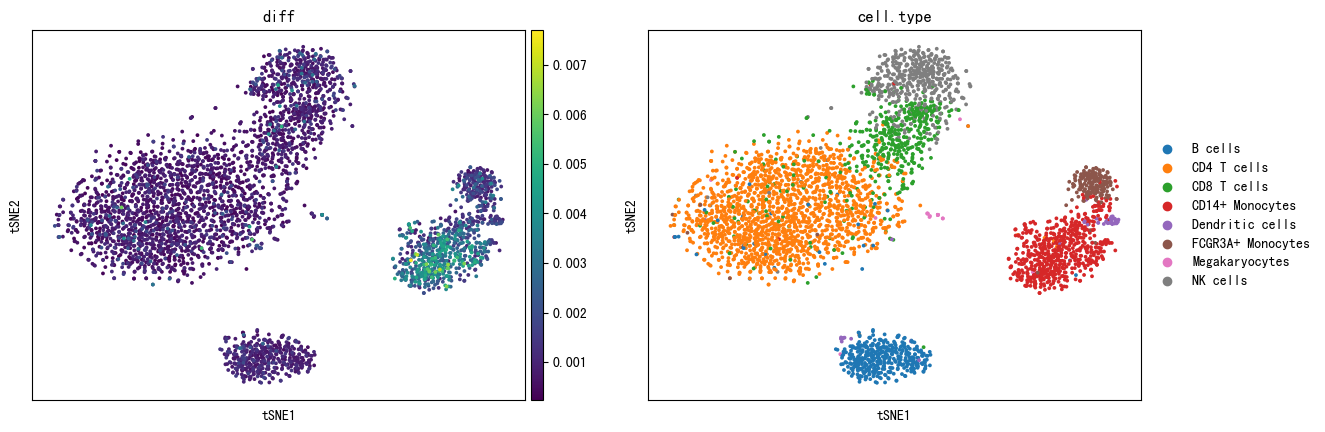

In [4]:
sc.tl.pca(b)
sc.tl.tsne(b)
sc.pl.tsne(b, color=['diff', 'cell.type'], save='_Monocytes.png')